In [6]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering


#IMPORTANT!
#probably the K-means algortihm gives slightly different results based on randomization and initial conditions
#this can be verified if you look at the results of centroid coordinates after each run
#there are different coordinates for centroids on multiple runs

numberOfClusters = 10
#note create your own filepath in this part to open the csv file
path = r'C:\Users\\Lauri\Documents\HealthTechnology Mathematics&Methods\drone_delivery_v1.csv'

#IMPORTANT good tip for csv checking is to open with notepad, and check what is the separator
# then you can even check inside excel if there are any bad values
# this time there werent any bad values (missing)
df = pd.read_csv(path,sep=';')
df.head()

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298


,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298


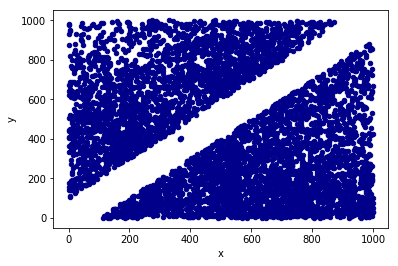

In [7]:
#make scatterplot with DarkBlue color
scatterPlot = df.plot.scatter(x='x',y='y',c='DarkBlue')

#drop clientid column
df.drop(columns=['clientid'], inplace=True)
df.head()

In [8]:
# save column headings into a list as they will be lost
colNames = df.columns.get_values()
print(colNames)


# normalize all variables to mean=0, sd=1
# scaler = StandardScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df))

#print scaled fi[]rst values
# df_scaled.head()

['x' 'y']


## BUG IN PYTHON 
#### or what is the reason why output centroids amount is more than the input cluster amount, for k-means (happened when n=3 clusters, result in 10 centroids)?
## NOTE::!! 
#### using algorithm='full', seemed to fix that bug 
#### with cluster.KMeans(n_clusters=numberOfClusters,algorithm='full') ##

## NOTE::!!
#### %%timeit causes timing of that block of code, (used for K-means timing)
#### there was some error cause in the next block after K-means when I used %%timeit
#### error was called "NameError: name 'centroids' is not defined" (happened at amountOfCentroids= len(centroids) )
#### error happened when you "run all cells", with %%timeit enabled
#### the bug is fixed if you comment that %%timeit (I don't know why)
#### when that line was commented the notebook should run properly all the way through
#### that bug doesnt really matter because you only needed to get the timings once, but it's still a strange bug...

In [9]:
#%%timeit #used to time the executiong of the k-means block
#start K-means clustering with n centers
kmeans = cluster.KMeans(n_clusters=numberOfClusters,algorithm='full')
kmeans.fit(df)
centroids = kmeans.cluster_centers_





In [10]:
#print the n centers

amountOfCentroids= len(centroids)
print(centroids)

# create a pandas data frame for centroid data
centroids_df = pd.DataFrame(centroids, columns=['x','y'])
c1=[]
for i in range(0,amountOfCentroids):
    c1.append(i)
#add column with clusterIDs, together with coords for centers
print(c1)
centroids_df['centroid_ID'] = c1
centroids_df

[[449.09847168 738.19663806]
 [847.23740725 124.82261854]
 [104.87781622 328.78131684]
 [882.19876967 644.24861349]
 [310.93880845  86.6382827 ]
 [178.29338708 828.71607344]
 [630.81775351 894.38179771]
 [746.26063074 405.76185746]
 [548.00127637 177.45192941]
 [204.06213024 526.0685095 ]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


,x,y,centroid_ID
0,449.098472,738.196638,0
1,847.237407,124.822619,1
2,104.877816,328.781317,2
3,882.198770,644.248613,3
4,310.938808,86.638283,4
5,178.293387,828.716073,5
6,630.817754,894.381798,6
7,746.260631,405.761857,7
8,548.001276,177.451929,8
9,204.062130,526.068509,9


In [11]:
#pythagoras distance
def dist(x2,y2, x1,y1):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

#store the centroid_IDs into series format, so we can merge it to df
resultslist=[]
clusterlist=[]
#iterate to find shortest distance, and then use that index
for i,row in df.iterrows():
    for j in range(amountOfCentroids):
        clusterlist.append(dist(df['x'][i],df['y'][i],  centroids_df['x'][j],centroids_df['y'][j]))
    resultslist.append( np.argmin(clusterlist)) #use the index, use it as centroidID
    clusterlist.clear()
#     cent0 = dist(df['x'][i],df['y'][i],  centroids_df['x'][0],centroids_df['y'][0])
#     cent1 = dist(df['x'][i],df['y'][i],  centroids_df['x'][1],centroids_df['y'][1])
#     cent2 = dist(df['x'][i],df['y'][i],  centroids_df['x'][2],centroids_df['y'][2])
#     temp = [cent0, cent1, cent2] #temprorary list to find min
#     resultslist.append( np.argmin(temp)) #use the index, use it as centroidID

In [12]:
#check if results look appropriate
print(len(resultslist))
print(resultslist)

5956
[8, 0, 9, 1, 0, 8, 6, 2, 0, 7, 9, 9, 6, 4, 1, 0, 5, 1, 8, 8, 0, 7, 8, 9, 8, 9, 9, 8, 9, 8, 4, 1, 8, 8, 8, 8, 4, 4, 2, 3, 3, 0, 7, 9, 9, 4, 9, 9, 3, 1, 7, 5, 8, 9, 1, 1, 8, 4, 2, 0, 9, 4, 6, 9, 7, 3, 6, 1, 6, 5, 1, 2, 1, 4, 9, 3, 3, 1, 6, 0, 7, 0, 6, 0, 2, 6, 7, 0, 8, 3, 7, 0, 5, 4, 8, 8, 7, 2, 2, 9, 8, 8, 4, 7, 1, 3, 8, 3, 8, 7, 2, 1, 9, 7, 6, 7, 3, 6, 8, 7, 1, 8, 6, 9, 4, 7, 3, 1, 9, 6, 7, 8, 5, 9, 5, 5, 2, 0, 0, 8, 1, 8, 1, 1, 2, 1, 9, 3, 2, 4, 8, 7, 1, 4, 5, 8, 8, 5, 0, 8, 8, 8, 6, 9, 1, 9, 9, 7, 6, 1, 5, 4, 7, 1, 8, 6, 1, 6, 5, 8, 6, 8, 4, 4, 4, 6, 1, 7, 9, 4, 6, 7, 1, 1, 6, 1, 1, 7, 1, 9, 8, 8, 1, 8, 4, 7, 7, 8, 7, 5, 7, 5, 9, 9, 6, 1, 7, 6, 5, 8, 9, 3, 1, 8, 6, 1, 9, 5, 1, 5, 7, 4, 2, 9, 7, 8, 8, 2, 7, 8, 7, 3, 7, 4, 8, 3, 9, 4, 3, 8, 8, 4, 1, 1, 4, 6, 4, 5, 2, 1, 3, 8, 1, 9, 8, 8, 8, 2, 9, 5, 9, 0, 1, 8, 4, 3, 8, 8, 3, 6, 3, 8, 0, 7, 8, 6, 4, 3, 9, 0, 4, 2, 5, 1, 5, 6, 8, 8, 2, 4, 6, 2, 1, 8, 1, 3, 2, 3, 1, 2, 8, 8, 6, 4, 4, 6, 7, 1, 8, 0, 8, 9, 8, 6, 1, 9, 2, 5, 2, 7, 0, 2

In [13]:
#add new series(clusterID) as a column into the df
df['cID'] = resultslist

#check results
df.head()

,x,y,cID
0,622.771572,164.857623,8
1,416.357298,630.193634,0
2,292.735020,567.333231,9
3,737.211288,166.225676,1
4,540.475375,682.912298,0


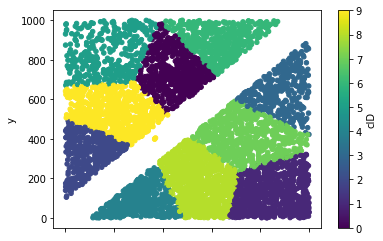

In [14]:
# make colored scatterplot

#scatterPlot = df.plot.scatter(x='x',y='y',c='DarkBlue')
COLORED_PLOT = df.plot.scatter(x='x',y='y',c='cID',colormap='viridis')


## find locations for 10 clusters 
## also check what is the timing results with 3 cluster vs 10 clusters


## TIMINGS ##
### 10 clusters k-means time was 530ms according to %%timeit (see above in the code)

### 3 clusters k-means time was 129ms according to %%timeit (see above in the code)




In [15]:
## find locations for 10 clusters 

#start K-means clustering with n centers
kmeans = cluster.KMeans(n_clusters=10,algorithm='full')
kmeans.fit(df)
ten_centroids = kmeans.cluster_centers_

#output the ten-centroid-coords
ten_centroids




array([[8.82768889e+02, 6.45621477e+02, 3.00000000e+00],
       [1.09290873e+02, 3.32749814e+02, 2.33995585e+00],
       [8.47237407e+02, 1.24822619e+02, 1.00000000e+00],
       [1.87181659e+02, 8.36290540e+02, 4.83460560e+00],
       [3.10938808e+02, 8.66382827e+01, 4.00000000e+00],
       [2.01218643e+02, 5.32063222e+02, 8.93767705e+00],
       [6.26473229e+02, 8.94336684e+02, 5.86046512e+00],
       [7.47143943e+02, 4.06808395e+02, 6.97444089e+00],
       [4.50242193e+02, 7.28502079e+02, 6.31578947e-02],
       [5.48181280e+02, 1.77705081e+02, 7.99796541e+00]])

In [16]:
#start agglomerative_clustering, n=10
agglo = AgglomerativeClustering(n_clusters=10).fit(df)

#output the results?!
agglo

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func='deprecated')

In [17]:
#fit model to data?!
agglo_clusters= agglo.fit_predict(df)

In [18]:
agglo_clusters #these are cluster labels, I think,
#we have to merge them together with df, into a column

array([0, 1, 2, ..., 5, 3, 0], dtype=int64)

In [19]:
#copy the original data into new dataframe
agglo_df =df

#drop old cID column
agglo_df.drop(columns=['cID'], inplace=True) 

#add new aggloIDcolumn
agglo_df['a_c_ID'] = agglo_clusters

#check the first values are ok
agglo_df.head()


,x,y,a_c_ID
0,622.771572,164.857623,0
1,416.357298,630.193634,1
2,292.735020,567.333231,2
3,737.211288,166.225676,4
4,540.475375,682.912298,1


In [20]:
##check the ending values if they are ok
agglo_df.tail()

,x,y,a_c_ID
5951,832.857394,616.861410,8
5952,242.734500,490.325092,2
5953,108.690847,758.833921,5
5954,803.251074,430.740623,3
5955,481.343899,285.910055,0


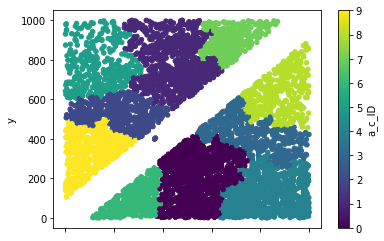

In [21]:
##plot the agglo_centers
AGGLO_PLOT = agglo_df.plot.scatter(x='x',y='y',c='a_c_ID',colormap='viridis')

## OBSERVATIONS

### the area shapes (voronoi?) are less angular and more smooth and blobby, when compared to the K-means